Pearson's R: 0.9096, P-value: 2.5810e-06


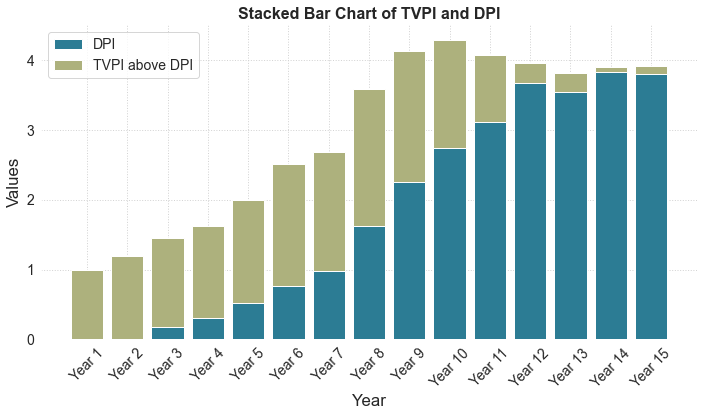

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr  # Import the required function for Pearson's correlation

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Load the data
file_path = 'Stacked Bar ES VC.xlsx'
df = pd.read_excel(file_path)

# Prepare data for stacked bar chart
years = df.columns[1:]  # Excluding the first unnamed column
tvpi_values = df.loc[df['Unnamed: 0'] == 'TVPI', years].values.flatten()
dpi_values = df.loc[df['Unnamed: 0'] == 'DPI', years].values.flatten()

# Calculate the remaining portion of TVPI that is not DPI (i.e., the "above DPI" portion)
tvpi_above_dpi_values = tvpi_values - dpi_values

# Calculate Pearson's correlation coefficient and p-value for TVPI and DPI
pearson_r, p_value = pearsonr(tvpi_values, dpi_values)
print(f"Pearson's R: {pearson_r:.4f}, P-value: {p_value:.4e}")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(years, dpi_values, label='DPI', color='#2C7C94')
ax.bar(years, tvpi_above_dpi_values, bottom=dpi_values, label='TVPI above DPI', color='#ADB17DFF')

ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Chart of TVPI and DPI')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a file
plt.savefig('DPI_RVPICorrel.png', dpi=600)

plt.show()

CAGR: 17.2
Duration (in years): 43.5
Multiple: 993.5


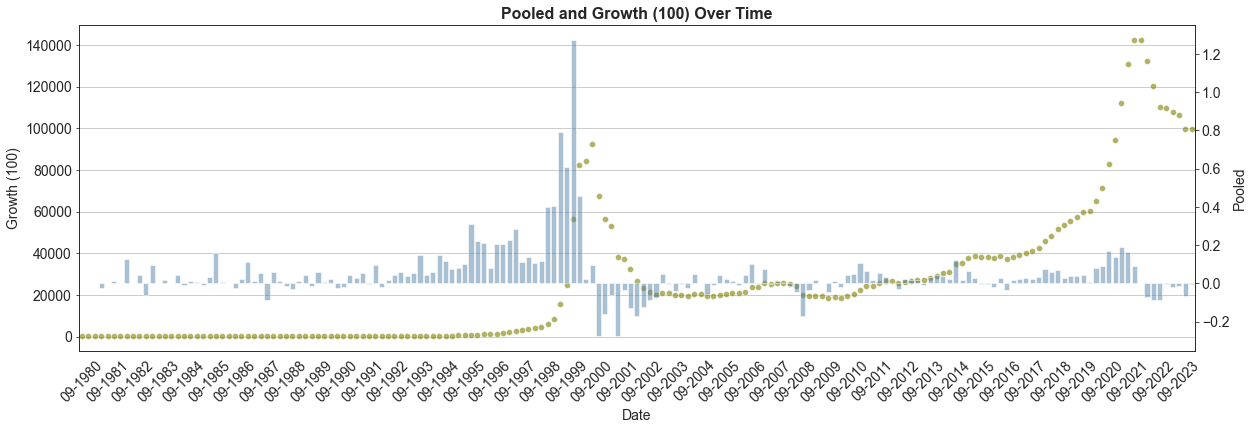

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Load the Excel file
df = pd.read_excel('TWR VCA.xlsx')

# Ensure the data is sorted by date
df = df.sort_values('Date')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the duration
duration = df['Date'].max() - df['Date'].min()

# Convert duration to number of days and then to years
n_years = duration.days / 365.25

# Calculate the number of quarters
n_quarters = len(df)

# Get the beginning and ending values
beginning_value = df.loc[n_quarters-1, "Growth (100)"]
ending_value = df.loc[0, "Growth (100)"]

# Calculate CAGR
cagr = (ending_value / beginning_value) ** (1/n_years) - 1

# Convert CAGR to percentage and round to 2 decimal places
cagr_percentage = round(cagr * 100, 2)

# Calculate the standard deviation of the 'Pooled*' column
std_dev = df['Pooled*'].std()

# Calculate the average return of the 'Pooled*' column
avg_return = df['Pooled*'].mean()

# We assume a risk-free rate of 0 for simplicity
risk_free_rate = 0

# Calculate the Sharpe Ratio
sharpe_ratio = (avg_return - risk_free_rate) / std_dev

# Round the standard deviation and Sharpe ratio to 2 decimal places
std_dev_percent = round(std_dev*100, 2)
sharpe_ratio = round(sharpe_ratio, 2)

# Calculate MOIC
f_ending_value = df.loc[0, 'Growth (100)']
moic = (f_ending_value - beginning_value) / beginning_value

# Print the results
print("CAGR:", cagr_percentage)
#print("Standard Deviation:", std_dev_percent)
#print("Sharpe Ratio:", sharpe_ratio)
print("Duration (in years):", round(n_years, 2))
print("Multiple:", round(moic, 2))

# Ensure the data is sorted by date
df = df.sort_values('Date')

# Format the 'Date' column to display only month, day, and year
df['Date_formatted'] = df['Date'].dt.strftime('%m-%Y')

# Set the plot style to a visually appealing one
sns.set_style("white")

# Initialize the figure size
fig, ax1 = plt.subplots(figsize=(20, 6))

# Create a scatter plot
sns.scatterplot(x='Date_formatted', y='Growth (100)', data=df, alpha=.6, s=35, color='olive', ax=ax1)

# Add horizontal gridlines
ax1.grid(True, axis='y')

# Label y-axis
ax1.set_ylabel('Growth (100)', fontsize=14)

# Create a new axis for the bar plot
ax2 = ax1.twinx()

# Create a bar plot with the 'Pooled*' data
sns.barplot(x='Date_formatted', y='Pooled*', data=df, color='steelblue', alpha=0.5, ax=ax2)

# Label y-axis
ax2.set_ylabel('Pooled', fontsize=14)

# Give the plot a title and set the axes labels
plt.title('Pooled and Growth (100) Over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)

# To fix the overlap, we can reduce the number of x-axis labels by only keeping every nth label
for ind, label in enumerate(ax1.get_xticklabels()):
    if ind % 4 == 0:  # this keeps every nth label (change the number to keep more or less labels)
        label.set_visible(True)
    else:
        label.set_visible(False)

# Rotate x-axis labels
plt.setp(ax1.get_xticklabels(), rotation=45)  # you can adjust the rotation degree here

# Save the plot as a file
plt.savefig('All Quarters.png', dpi=600)

# Display the plot
plt.show()

CAGR (Dropped): 7.26
Duration (in years, Dropped): 43.5
Multiple (Dropped): 21.07


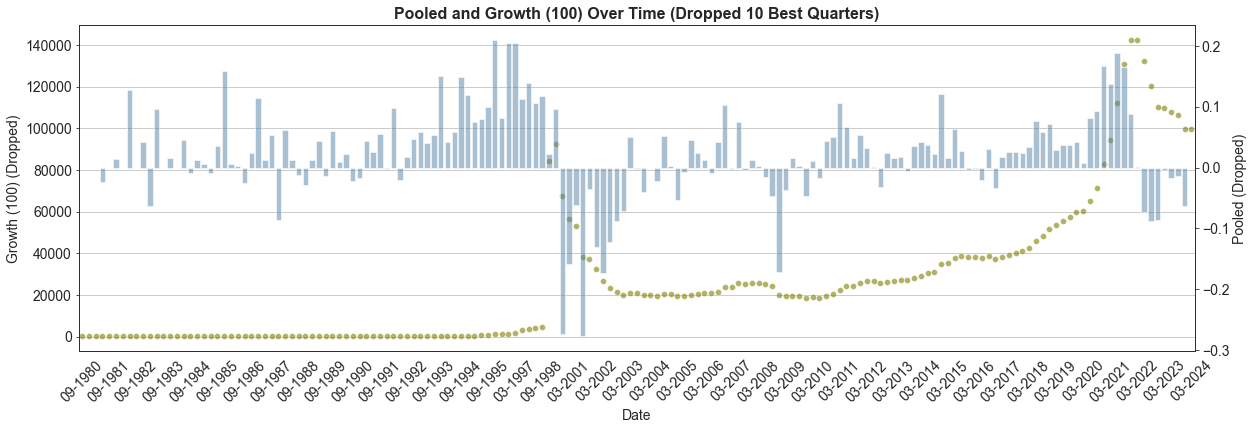

In [3]:
# Dropping best quarters no dates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Load the Excel file
df = pd.read_excel('TWR VCA.xlsx')

# Ensure the data is sorted by date
df.sort_values('Date', inplace=True)

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Number of quarters to drop
n_drop_quarters = 10  # Adjust this number

# Drop the 'n' best quarters if n_drop_quarters is greater than 0
if n_drop_quarters > 0:
    best_quarters = df.nlargest(n_drop_quarters, 'Pooled*').index
    df_dropped = df.drop(best_quarters)
else:
    df_dropped = df.copy()

# Re-sort by date after dropping best quarters
df_dropped.sort_values('Date', inplace=True)

# Reconstruct the ending value after dropping best quarters
initial_value = 100
for return_value in df_dropped['Pooled*']:
    initial_value *= (1 + return_value)

ending_value_dropped = initial_value

# Calculate metrics for the adjusted data
beginning_value_dropped = 100
duration_dropped = df_dropped['Date'].max() - df_dropped['Date'].min()
n_years_dropped = duration_dropped.days / 365.25
cagr_dropped = ((ending_value_dropped / beginning_value_dropped) ** (1/n_years_dropped)) - 1
cagr_percentage_dropped = round(cagr_dropped * 100, 2)

# Other metrics
std_dev_dropped = df_dropped['Pooled*'].std()
avg_return_dropped = df_dropped['Pooled*'].mean()
risk_free_rate = 0
sharpe_ratio_dropped = (avg_return_dropped - risk_free_rate) / std_dev_dropped
std_dev_percent_dropped = round(std_dev_dropped*100, 2)
sharpe_ratio_dropped = round(sharpe_ratio_dropped, 2)
moic_dropped = ending_value_dropped / beginning_value_dropped

# Print results without best quarters
print("CAGR (Dropped):", cagr_percentage_dropped)
#print("Standard Deviation (Dropped):", std_dev_percent_dropped)
#print("Sharpe Ratio (Dropped):", sharpe_ratio_dropped)
print("Duration (in years, Dropped):", round(n_years_dropped, 2))
print("Multiple (Dropped):", round(moic_dropped, 2))

# Visualization for the dropped dataset
df_dropped['Date_formatted'] = df_dropped['Date'].dt.strftime('%m-%Y')
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(20, 6))
sns.scatterplot(x='Date_formatted', y='Growth (100)', data=df_dropped, alpha=.6, s=35, color='olive', ax=ax1)
ax1.grid(True, axis='y')
ax1.set_ylabel('Growth (100) (Dropped)', fontsize=14)
ax2 = ax1.twinx()
sns.barplot(x='Date_formatted', y='Pooled*', data=df_dropped, color='steelblue', alpha=0.5, ax=ax2)
ax2.set_ylabel('Pooled (Dropped)', fontsize=14)
plt.title('Pooled and Growth (100) Over Time (Dropped 10 Best Quarters)', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)

# Adjust x-axis labels
for ind, label in enumerate(ax1.get_xticklabels()):
    if ind % 4 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.setp(ax1.get_xticklabels(), rotation=45)

# Save the plot as a file
plt.savefig('Missed Quarters.png', dpi=600)

# Display the plot
plt.show()

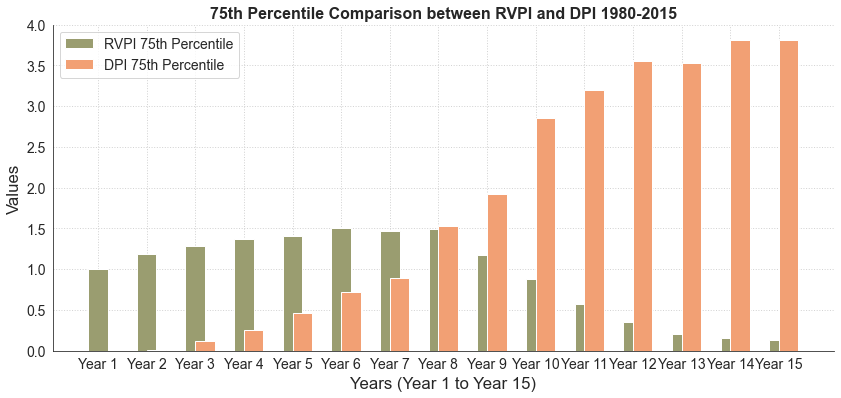

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Load the two Excel files
rvpi_file_path = 'RVPI.xlsx'
dpi_file_path = 'DPI.xlsx'

rvpi_df = pd.read_excel(rvpi_file_path)
dpi_df = pd.read_excel(dpi_file_path)

# Extract the data for the 75th percentile for columns 'Year 11' to 'Year 15'
rvpi_75th = rvpi_df.loc[2, 'Year 1':'Year 15']
dpi_75th = dpi_df.loc[2, 'Year 1':'Year 15']

# Create a bar chart
plt.figure(figsize=(14, 6))

plt.bar(rvpi_75th.index, rvpi_75th.values, width=0.4, label='RVPI 75th Percentile', color= '#9a9d70', align='center')
plt.bar(dpi_75th.index, dpi_75th.values, width=0.4, label='DPI 75th Percentile',  color= '#f2a074', align='edge')

plt.xlabel('Years (Year 1 to Year 15)')
plt.ylabel('Values')
plt.title('75th Percentile Comparison between RVPI and DPI 1980-2015')
plt.legend()
plt.grid(True)

# Save the plot as a file
plt.savefig('DPI_RVPI.png', dpi=600)

plt.show()

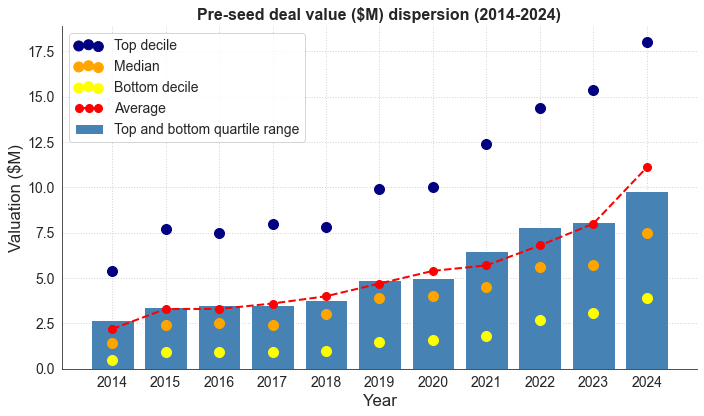

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Creating the data from the first image table into a dataframe
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Top decile': [5.4, 7.7, 7.5, 8.0, 7.8, 9.9, 10.0, 12.4, 14.4, 15.4, 18.0],
    'Median': [1.4, 2.4, 2.5, 2.4, 3.0, 3.9, 4.0, 4.5, 5.6, 5.7, 7.5],
    'Bottom decile': [0.5, 0.9, 0.9, 0.9, 1.0, 1.5, 1.6, 1.8, 2.7, 3.1, 3.9],
    'Top and bottom quartile range': [2.7, 3.4, 3.5, 3.5, 3.8, 4.9, 5.0, 6.5, 7.8, 8.1, 9.8],
    'Average': [2.2, 3.3, 3.3, 3.6, 4.0, 4.7, 5.4, 5.7, 6.8, 8.0, 11.1]
}

df = pd.DataFrame(data)

# Plotting the chart similar to the second image
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for the top and bottom quartile range
ax.bar(df['Year'], df['Top and bottom quartile range'], color='steelblue', label='Top and bottom quartile range')

# Plotting lines for top decile, median, and bottom decile
ax.scatter(df['Year'], df['Top decile'], color='navy', label='Top decile', marker='o', s=100)
ax.scatter(df['Year'], df['Median'], color='orange', label='Median', marker='o', s=100)
ax.scatter(df['Year'], df['Bottom decile'], color='yellow', label='Bottom decile', marker='o', s=100)

# Adding the average line
ax.plot(df['Year'], df['Average'], color='red', label='Average', linewidth=2, linestyle='--')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Valuation ($M)')
ax.set_title('Pre-seed deal value ($M) dispersion (2014-2024)')
ax.legend()

plt.xticks(df['Year'])

# Show the plot
plt.tight_layout()

# Save the plot as file
plt.savefig('PitchValue.png', dpi=600)

plt.show()

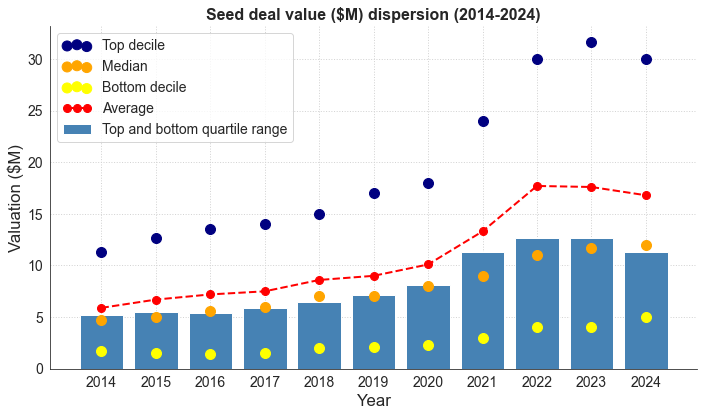

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Creating the data from the second table image into a dataframe for Seed pre-money valuation
seed_data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Top decile': [11.3, 12.7, 13.5, 14.0, 15.0, 17.0, 18.0, 24.0, 30.0, 31.6, 30.0],
    'Median': [4.7, 5.0, 5.6, 6.0, 7.0, 7.0, 8.0, 9.0, 11.0, 11.7, 12.0],
    'Bottom decile': [1.7, 1.5, 1.4, 1.5, 2.0, 2.1, 2.3, 3.0, 4.0, 4.0, 5.0],
    'Top and bottom quartile range': [5.2, 5.5, 5.4, 5.9, 6.5, 7.1, 8.1, 11.3, 12.7, 12.7, 11.3],
    'Average': [5.9, 6.7, 7.2, 7.5, 8.6, 9.0, 10.1, 13.3, 17.7, 17.6, 16.8]
}

seed_df = pd.DataFrame(seed_data)

# Plotting the chart similar to the second image
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for the top and bottom quartile range
ax.bar(seed_df['Year'], seed_df['Top and bottom quartile range'], color='steelblue', label='Top and bottom quartile range')

# Plotting lines for top decile, median, and bottom decile
ax.scatter(seed_df['Year'], seed_df['Top decile'], color='navy', label='Top decile', marker='o', s=100)
ax.scatter(seed_df['Year'], seed_df['Median'], color='orange', label='Median', marker='o', s=100)
ax.scatter(seed_df['Year'], seed_df['Bottom decile'], color='yellow', label='Bottom decile', marker='o', s=100)

# Adding the average line
ax.plot(seed_df['Year'], seed_df['Average'], color='red', label='Average', linewidth=2, linestyle='--')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Valuation ($M)')
ax.set_title('Seed deal value ($M) dispersion (2014-2024)')
ax.legend()

plt.xticks(seed_df['Year'])

# Show the plot
plt.tight_layout()

# Save the plot as a file
plt.savefig('PitchValue.png', dpi=600)

plt.show()

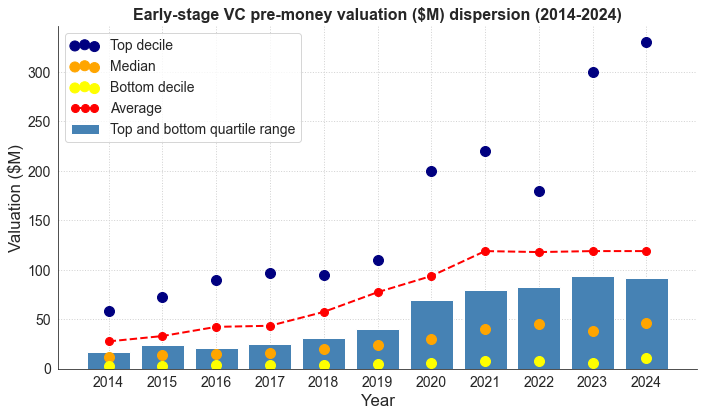

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Creating the data from the updated image table into a dataframe
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Top decile': [58.3, 73.0, 90.0, 97.0, 95.0, 110.0, 200.0, 220.0, 180.0, 300.0, 330.0],
    'Median': [12.0, 13.7, 15.0, 16.0, 20.0, 24.0, 30.0, 40.0, 45.0, 38.0, 46.5],
    'Bottom decile': [2.8, 3.3, 3.5, 4.0, 4.0, 4.5, 5.6, 7.8, 8.0, 5.8, 10.7],
    'Top and bottom quartile range': [3.0, 3.5, 3.8, 4.1, 4.0, 7.3, 5.3, 7.8, 7.8, 9.3, 9.3],
    'Average': [27.7, 33.1, 42.4, 43.5, 57.5, 77.4, 93.8, 119.0, 118.0, 119.0, 119.0],
    'Top quartile': [22.2, 30.0, 27.8, 32.6, 40.3, 50.0, 85.9, 98.4, 98.4, 112.0, 112.0],
    'Bottom quartile': [5.5, 5.5, 7.0, 8.0, 8.7, 10.0, 16.0, 19.0, 16.0, 18.0, 20.0]
}

# Converting data into DataFrame
df = pd.DataFrame(data)

# Dynamically calculate the Top and Bottom quartile range
df['Top and bottom quartile range'] = df['Top quartile'] - df['Bottom quartile']

# Plotting the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for the top and bottom quartile range
ax.bar(df['Year'], df['Top and bottom quartile range'], color='steelblue', label='Top and bottom quartile range')

# Plotting lines for top decile, median, and bottom decile
ax.scatter(df['Year'], df['Top decile'], color='navy', label='Top decile', marker='o', s=100)
ax.scatter(df['Year'], df['Median'], color='orange', label='Median', marker='o', s=100)
ax.scatter(df['Year'], df['Bottom decile'], color='yellow', label='Bottom decile', marker='o', s=100)

# Adding the average line
ax.plot(df['Year'], df['Average'], color='red', label='Average', linewidth=2, linestyle='--')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Valuation ($M)')
ax.set_title('Early-stage VC pre-money valuation ($M) dispersion (2014-2024)')
ax.legend()

plt.xticks(df['Year'])

# Show the plot
plt.tight_layout()

# Save the plot as file
plt.savefig('PitchValue.png', dpi=600)

plt.show()

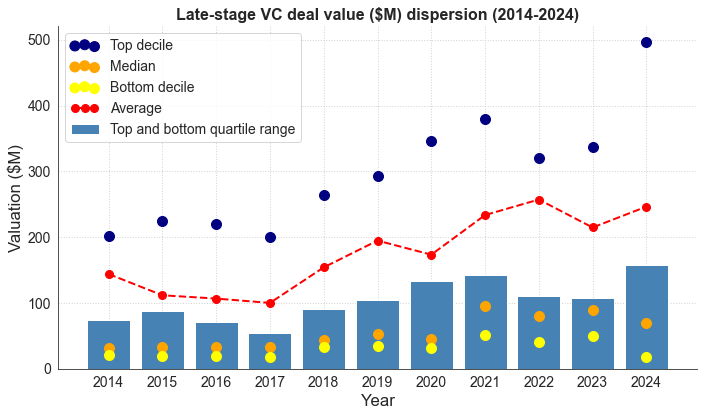

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Creating the data from the third table image into a dataframe for late-stage VC pre-money valuation
late_stage_data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Top decile': [202.3, 224.7, 220.5, 200.0, 264.8, 292.5, 346.8, 379.0, 320.0, 337.5, 496.0],
    'Median': [31.0, 33.1, 33.0, 33.0, 43.0, 53.0, 45.0, 96.0, 80.0, 90.0, 70.1],
    'Bottom decile': [20.3, 20.0, 19.0, 17.5, 33.0, 35.0, 31.0, 51.0, 41.0, 50.0, 17.3],
    'Top and bottom quartile range': [74.6, 87.7, 71.3, 54.1, 91.0, 104.0, 133.7, 143.0, 110.7, 107.9, 157.7],
    'Average': [144.0, 111.7, 106.7, 100.1, 154.1, 194.8, 173.4, 233.6, 257.2, 214.7, 246.4]
}

late_stage_df = pd.DataFrame(late_stage_data)

# Plotting the chart similar
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for the top and bottom quartile range
ax.bar(late_stage_df['Year'], late_stage_df['Top and bottom quartile range'], color='steelblue', label='Top and bottom quartile range')

# Plotting lines for top decile, median, and bottom decile
ax.scatter(late_stage_df['Year'], late_stage_df['Top decile'], color='navy', label='Top decile', marker='o', s=100)
ax.scatter(late_stage_df['Year'], late_stage_df['Median'], color='orange', label='Median', marker='o', s=100)
ax.scatter(late_stage_df['Year'], late_stage_df['Bottom decile'], color='yellow', label='Bottom decile', marker='o', s=100)

# Adding the average line
ax.plot(late_stage_df['Year'], late_stage_df['Average'], color='red', linewidth=2, label='Average', linestyle='--')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Valuation ($M)')
ax.set_title('Late-stage VC deal value ($M) dispersion (2014-2024)')
ax.legend()

plt.xticks(late_stage_df['Year'])

# Show the plot
plt.tight_layout()

# Save the plot as a file
plt.savefig('PitchValue.png', dpi=600)

plt.show()

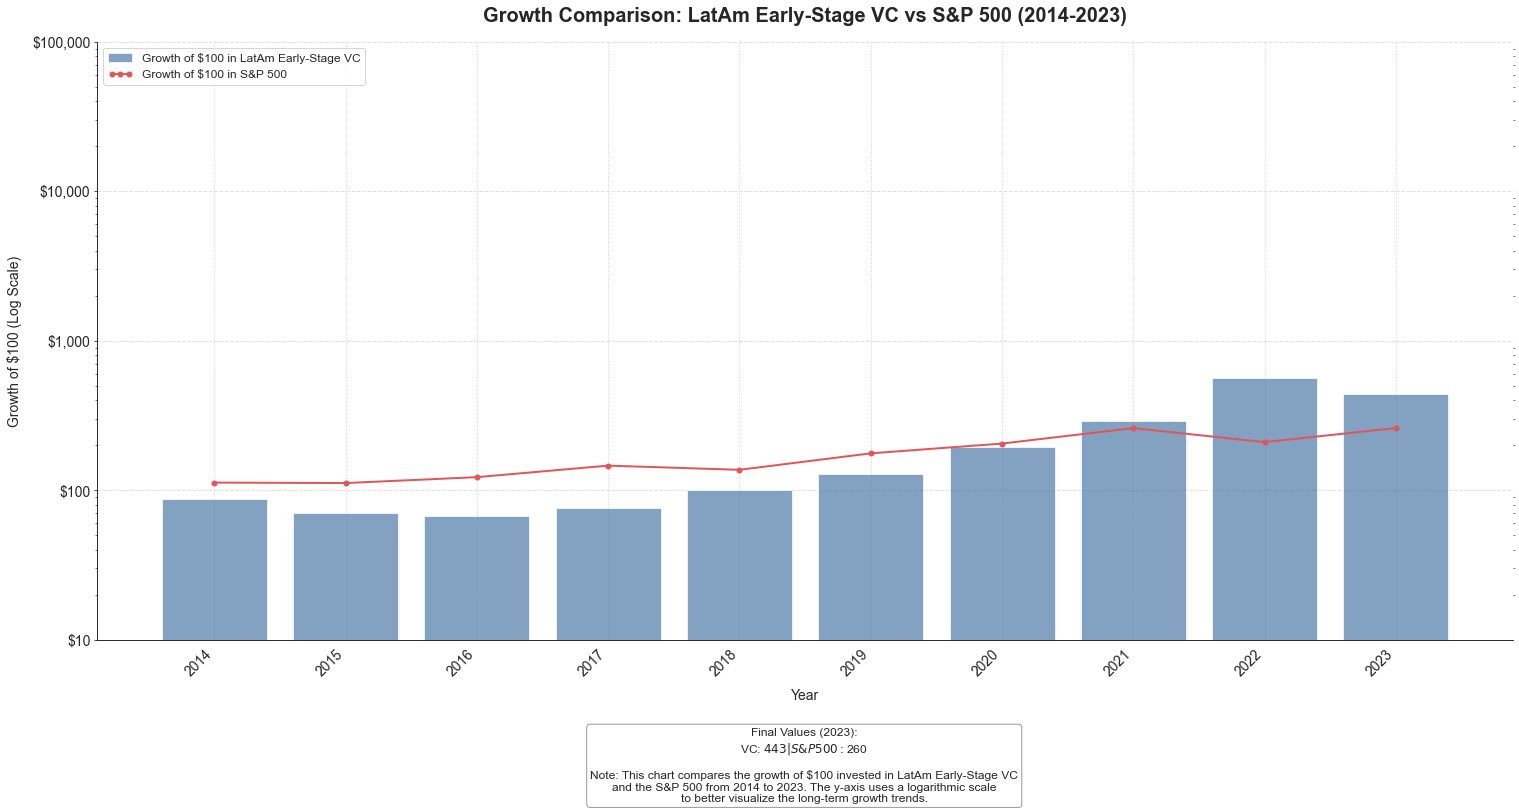

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Fetch S&P 500 data from yfinance
sp500 = yf.Ticker('^GSPC')
sp500_hist = sp500.history(start='2014-01-01', end='2024-01-01')

# Read the CSV data
data = pd.read_csv('Funds_Time_Series_Calculator-12.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Ensure 'Index Value' is treated as string before replacing commas
data['Index Value'] = data['Index Value'].astype(str)

# Convert 'Index Value' to numeric, removing any commas and converting to float
data['Index Value'] = data['Index Value'].str.replace(',', '').astype(float)

# Filter data for years 2014-2023
data_filtered = data[(data['Year'] >= 2014) & (data['Year'] <= 2023)]

# Group by year and take the last Index Value for each year
yearly_data = data_filtered.groupby('Year')['Index Value'].last().reset_index()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(24, 12))

# Create the bar chart with a logarithmic y-axis
bars = ax1.bar(yearly_data['Year'], yearly_data['Index Value'], color='#4e79a7', alpha=0.7, label='Growth of $100 in LatAm Early-Stage VC')
ax1.set_yscale('log')

# Customize the chart
plt.title('Growth Comparison: LatAm Early-Stage VC vs S&P 500 (2014-2023)', fontsize=20, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14, labelpad=10)
ax1.set_ylabel('Growth of $100 (Log Scale)', fontsize=14, labelpad=10)

# Set x-axis ticks to show each year in the range
ax1.set_xticks(range(2014, 2024))
ax1.set_xticklabels(range(2014, 2024), rotation=45, ha='right')

# Set y-axis ticks to show major increments
y_ticks = [10, 100, 1000, 10000, 100000]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f'${x:,}' for x in y_ticks])

# Add gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate growth of $100 invested in S&P 500
initial_value = sp500_hist['Close'].iloc[0]
sp500_hist['Growth'] = (sp500_hist['Close'] / initial_value) * 100

# Resample to get yearly data using 'YE' for year-end
sp500_yearly = sp500_hist['Growth'].resample('YE').last()

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Overlay the line plot
line = ax2.plot(sp500_yearly.index.year, sp500_yearly.values, color='#e15759', marker='o', linestyle='-', linewidth=2, markersize=5, label='Growth of $100 in S&P 500')

# Set the y-axis for the S&P 500 data
ax2.set_yscale('log')
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks([])  # Remove the ticks on the right side

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Increase bottom margin

# Add a text box with additional information and final values above the x-axis
last_vc_value = yearly_data['Index Value'].iloc[-1]
last_sp500_value = sp500_yearly.iloc[-1]

summary_text = (
    f"Final Values (2023):\n"
    f"VC: ${last_vc_value:,.0f} | S&P 500: ${last_sp500_value:,.0f}\n\n"
    "Note: This chart compares the growth of $100 invested in LatAm Early-Stage VC\n"
    "and the S&P 500 from 2014 to 2023. The y-axis uses a logarithmic scale\n"
    "to better visualize the long-term growth trends."
)

fig.text(0.47, 0.01, summary_text,
         ha='center', va='bottom', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

# Adjust the bottom margin to accommodate the note and summary
plt.subplots_adjust(bottom=0.2, right=0.88)

# Save the plot as a file
plt.savefig('VCGrowthS&P.png', dpi=600)

plt.show()

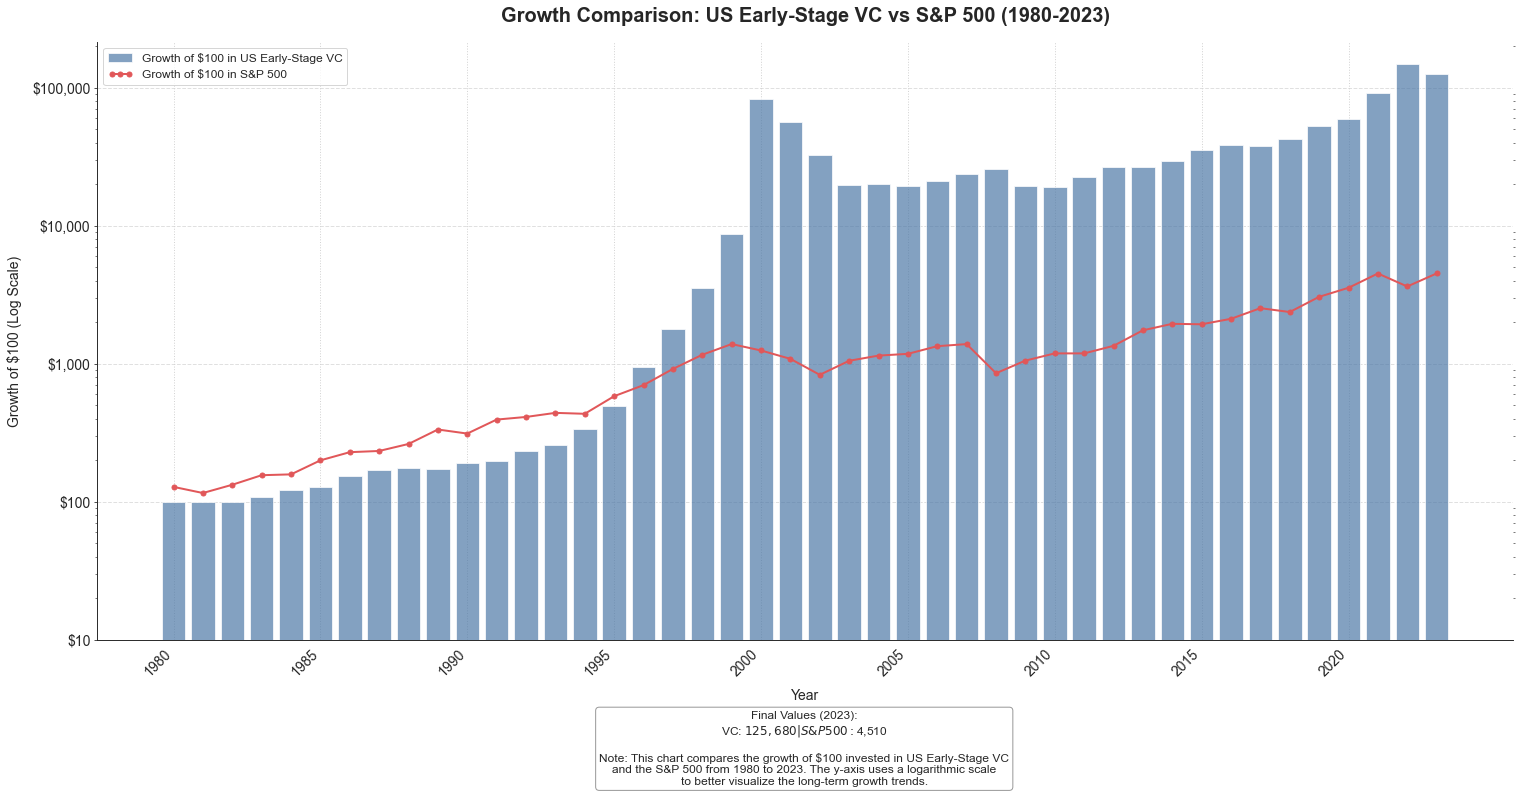

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

from matplotlib.ticker import FuncFormatter

# Fetch S&P 500 data from yfinance
sp500 = yf.Ticker('^GSPC')
sp500_hist = sp500.history(start='1980-01-01', end='2024-01-01')

# Read the CSV data
data = pd.read_csv('Funds_Time_Series_Calculator-10.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Ensure 'Index Value' is string and convert to numeric, removing any commas and converting to float
data['Index Value'] = data['Index Value'].astype(str).str.replace(',', '').astype(float)

# Filter data for years 1980-2023
data_filtered = data[(data['Year'] >= 1980) & (data['Year'] <= 2023)]

# Group by year and take the last Index Value for each year
yearly_data = data_filtered.groupby('Year')['Index Value'].last().reset_index()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(24, 12))

# Create the bar chart with a logarithmic y-axis
bars = ax1.bar(yearly_data['Year'], yearly_data['Index Value'], color='#4e79a7', alpha=0.7, label='Growth of $100 in US Early-Stage VC')
ax1.set_yscale('log')

# Customize the chart
plt.title('Growth Comparison: US Early-Stage VC vs S&P 500 (1980-2023)', fontsize=20, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14, labelpad=10)
ax1.set_ylabel('Growth of $100 (Log Scale)', fontsize=14, labelpad=10)

# Set x-axis ticks to show more years
ax1.set_xticks(range(1980, 2025, 5))
ax1.set_xticklabels(range(1980, 2025, 5), rotation=45, ha='right')

# Set y-axis ticks to show major increments
y_ticks = [10, 100, 1000, 10000, 100000]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f'${x:,}' for x in y_ticks])

# Add gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate growth of $100 invested in S&P 500
initial_value = sp500_hist['Close'].iloc[0]
sp500_hist['Growth'] = (sp500_hist['Close'] / initial_value) * 100

# Resample to get yearly data using 'YE' for year-end
sp500_yearly = sp500_hist['Growth'].resample('YE').last().reset_index()

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Overlay the line plot
line = ax2.plot(sp500_yearly['Date'].dt.year, sp500_yearly['Growth'], color='#e15759', marker='o', linestyle='-', linewidth=2, markersize=5, label='Growth of $100 in S&P 500')

# Set the y-axis for the S&P 500 data
ax2.set_yscale('log')
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks([])  # Remove the ticks on the right side

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Increase bottom margin

# Add a text box with additional information and final values above the x-axis
last_vc_value = yearly_data['Index Value'].iloc[-1]
last_sp500_value = sp500_yearly['Growth'].iloc[-1]

summary_text = (
    f"Final Values (2023):\n"
    f"VC: ${last_vc_value:,.0f} | S&P 500: ${last_sp500_value:,.0f}\n\n"
    "Note: This chart compares the growth of $100 invested in US Early-Stage VC\n"
    "and the S&P 500 from 1980 to 2023. The y-axis uses a logarithmic scale\n"
    "to better visualize the long-term growth trends."
)

fig.text(0.47, 0.03, summary_text,
         ha='center', va='bottom', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

# Adjust the bottom margin to accommodate the note and summary
plt.subplots_adjust(bottom=0.2, right=0.88)

# Save the plot as a file
plt.savefig('VCGrowthS&P.png', dpi=600)

plt.show()

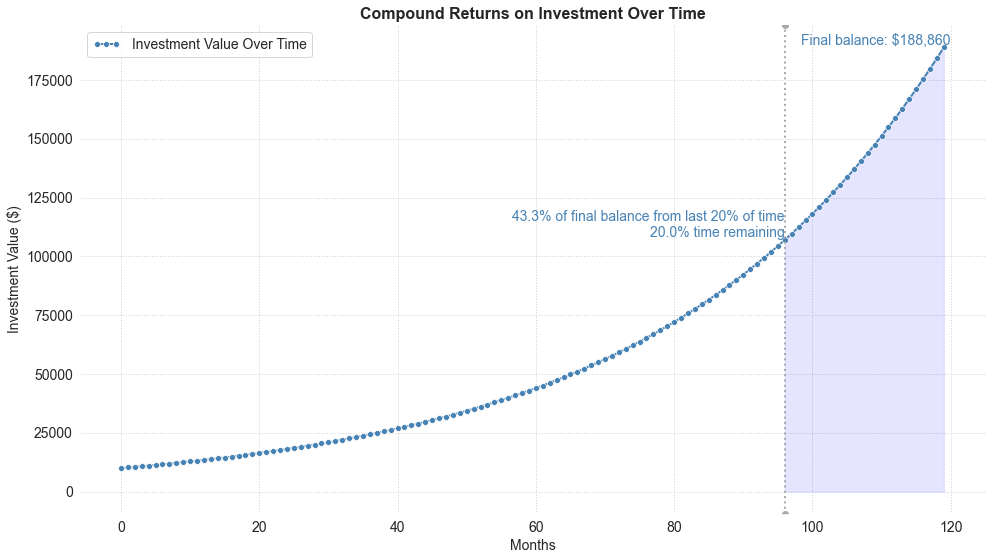

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')

# Initial conditions
initial_investment = 10000  # initial investment amount
monthly_investment = 0  # amount invested each month
average_annual_return = 0.3  # average annual return

years = 10  # time span

# Calculate the total number of months
months = years * 12

# Prepare a list to store balance at each month
investment_value_over_time = np.zeros(months)

# Initial balance is the initial investment
investment_value_over_time[0] = initial_investment

# Calculate balance for each month
for month in range(1, months):
    # Returns are compounded monthly
    return_on_investment = (investment_value_over_time[month - 1] + monthly_investment) * (average_annual_return / 12)
    investment_value_over_time[month] = investment_value_over_time[month - 1] + monthly_investment + return_on_investment

# Generate x values (months)
x = np.array(range(months))

# Create plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=x, y=investment_value_over_time, label='Investment Value Over Time', color="steelblue")

# Draw a line at 80% of the time, and annotate with the percentage of the final balance and time remaining at that time
x_80_percent = int(0.8 * months)
balance_80_percent = investment_value_over_time[x_80_percent]
gain_in_last_20_percent = investment_value_over_time[-1] - balance_80_percent

plt.axvline(x=x_80_percent, color='darkgrey', linestyle='dotted')
plt.text(x_80_percent, balance_80_percent, f'{100 * gain_in_last_20_percent / investment_value_over_time[-1]:.1f}% of final balance from last 20% of time\n{100 * (1 - 0.8):.1f}% time remaining', color='steelblue', va='bottom', ha='right', fontsize=14)

# Shade the last 20% of time lightly
plt.fill_between(x, investment_value_over_time, where=(x >= x_80_percent), color='blue', alpha=0.1)

# Annotate with the final balance
plt.text(months, investment_value_over_time[-1], f'Final balance: ${investment_value_over_time[-1]:,.0f}', color='steelblue', va='bottom', ha='right', fontsize=14)

plt.title('Compound Returns on Investment Over Time', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Investment Value ($)', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()

# Save the plot as a file
plt.savefig('CAGRLast20.png', dpi=600)

plt.show()

# Liquidity Ratios in Private Equity

## 1. Unfunded PE Ratio

**Definition:** Unfunded commitments as a percentage of liquid assets.

**Significance:** 
- Higher ratio indicates a younger average vintage of PE portfolio
- Younger vintages typically result in lower cash distributions
- Less cash available for future capital calls

**Funding sources for capital calls:**
1. Liquid portion of the portfolio
2. Distributions from existing PE allocation
3. Credit lines

**Risks:**
- Higher ratio of unfunded commitments to liquid assets increases challenges in meeting capital calls
- Higher unfunded portion typically means lower cash distributions from GPs for future capital calls

**Caution threshold:** > 30%

## 2. Liquidity Pain Ratio

**Definition:** Unfunded illiquid assets as a ratio to liquid assets.

**Caution threshold:** > 40%

## 3. Illiquid Allocation

**Definition:** Ratio of illiquid assets to total assets.

**Caution threshold:** > 45%

## 4. Illiquid Assets + Unfunded Commitments

**Definition:** Sum of illiquid assets and unfunded commitments as a ratio to total assets.

**Caution threshold:** > 75%

## Key Takeaways

1. These ratios help assess an LP's ability to meet future capital calls and manage liquidity risk.
2. Higher ratios generally indicate increased liquidity risk and potential challenges in portfolio management.
3. Monitoring these ratios is crucial for maintaining a balanced and sustainable private equity portfolio.

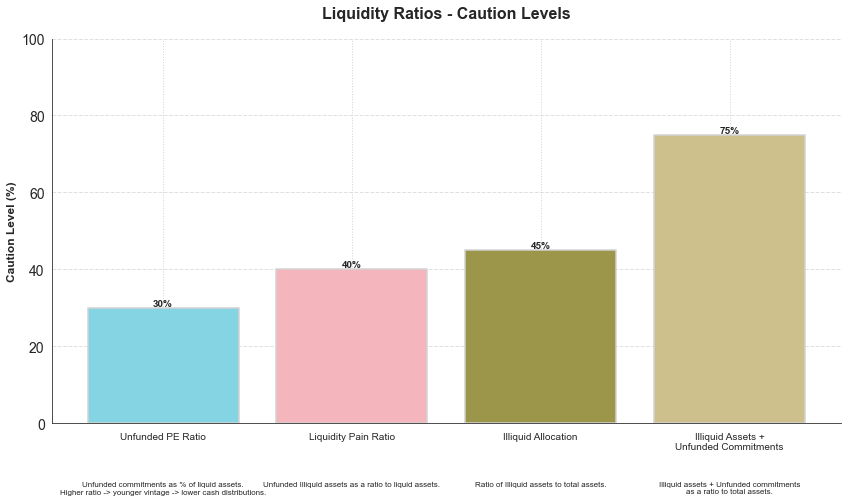

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Set the aesthetic style of the plots
plt.style.use('wes_anderson')  # This is a close approximation to 'wes_anderson' style

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define data
ratios = ['Unfunded PE Ratio', 'Liquidity Pain Ratio', 'Illiquid Allocation', 'Illiquid Assets +\nUnfunded Commitments']
caution_levels = [30, 40, 45, 75]
colors = ['#85D4E3', '#F4B5BD', '#9C964A', '#CDC08C']

# Create bar chart
x = np.arange(len(ratios))
bars = ax.bar(x, caution_levels, color=colors, edgecolor='lightgrey', linewidth=1.5)

# Customize the plot
ax.set_ylim(0, 100)
ax.set_ylabel('Caution Level (%)', fontsize=12, fontweight='bold')
ax.set_title('Liquidity Ratios - Caution Levels', fontsize=16, fontweight='bold', pad=20)

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(ratios, rotation=0, ha='center')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add descriptions
descriptions = [
    "Unfunded commitments as % of liquid assets.\nHigher ratio -> younger vintage -> lower cash distributions.",
    "Unfunded Illiquid assets as a ratio to liquid assets.",
    "Ratio of Illiquid assets to total assets.",
    "Illiquid assets + Unfunded commitments\nas a ratio to total assets."
]

for i, desc in enumerate(descriptions):
    ax.text(i, -15, desc, ha='center', va='top', wrap=True, fontsize=8)

# Customize grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize x-axis
ax.tick_params(axis='x', which='major', labelsize=10, pad=5)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# To save as PNG:
plt.savefig('liquidity_ratios.png', dpi=600, bbox_inches='tight')

plt.show()